# Single Q Learning Agent against Random Interval Agents
---

Start with importing necessary packages, modules:

In [1]:
import sys
sys.path.append('.')
import gym
from IPython.display import clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import warnings
import random
import os
import pickle
# pandas setting warnings can be ignored, as it is intendend often
warnings.simplefilter("ignore")

from QLearningAgents import QLearningBuyer, QLearningSeller
from RandOfferAgents import RandOfferBuyer, RandOfferSeller
from RandInterAgents import RandInterBuyer, RandInterSeller
from utils import *

from environments import MarketEnvironment
from info_settings import BlackBoxSetting
from matchers import RandomMatcher

## Experiment Metrics
---
Define the experiment, Setup the market environment

In [2]:
%%time
#Number of Episodes
n_episodes = 1000
#Interval to print statistics
n_stats = 10 #n_episodes/100
#Negative reward for q-learning when agent is not yet done in Episode
negative_reward = -1
#How many games to run, to stabilize results
n_games = 1

for i in range(n_games):

    # Get Agents with defined:
    # Reservation prices
    # Starting/Default prices
    # Number of different classes of sellers and buyers
    buyers, sellers, inequality, q_learn_agents = get_agents_equal(sellr_reserve = 90, buyer_reserve = 110,
                                                               sellr_default = 110, buyer_default = 90,
                                                               n_rnd_off_buyers = 0, n_rnd_off_sellrs = 0,
                                                               n_rnd_int_buyers = 3, n_rnd_int_sellrs = 3,
                                                               n_q_learn_buyers = 1, n_q_learn_sellrs = 0,
                                                               n_states = 20)

    set_hyperparameters(buyers + sellers, alpha=0.1, gamma=0.95, epsilon=0.1)
    dir_path = f'{n_episodes}_{n_stats}_B{len(buyers)}_S{len(sellers)}_Q{len(q_learn_agents)}'
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)

    market_env = MarketEnvironment(sellers=sellers, buyers=buyers, max_steps=30,  
                                   matcher=RandomMatcher(reward_on_reference=True), setting=BlackBoxSetting)
    steps_list = learn(market_env, buyers, sellers, q_learn_agents, n_episodes, n_stats, negative_reward, inequality)
    with open(f'{dir_path}/{i}buyers.pkl', 'wb') as f:
        pickle.dump(buyers, f)
    with open(f'{dir_path}/{i}sellers.pkl', 'wb') as f:
        pickle.dump(sellers, f)
    with open(f'{dir_path}/{i}steps.pkl', 'wb') as f:
        pickle.dump(steps_list, f)

Episode 1000: Steps=1.8
B[i0]: Rewards=5.362134193598429
B[i1]: Rewards=7.635704472805332
B[i2]: Rewards=2.2623459040160654
B[q0]: Rewards=6.0339750179906035
S[i0]: Rewards=12.36804353042989
S[i1]: Rewards=14.60356520847613
S[i2]: Rewards=11.734231672683551
CPU times: user 1min 5s, sys: 460 ms, total: 1min 6s
Wall time: 1min 4s


## Plot Averaged Results, Q Tables
---
* Buyer Rewards, Seller Rewards
* Steps per Episode
* Q Tables

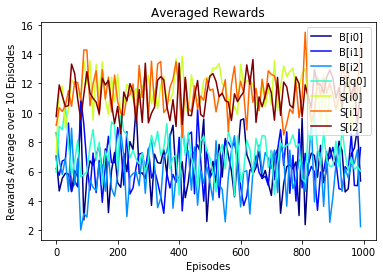

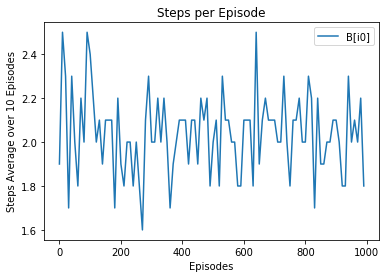

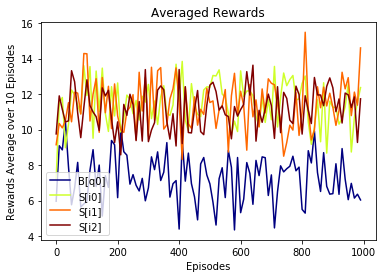

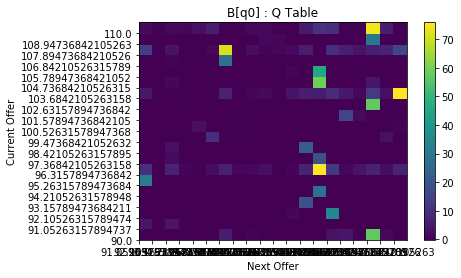

In [3]:
for i in range(n_games):
    with open(f'{dir_path}/{i}buyers.pkl', 'rb') as f:
        buyers = pickle.load(f)
    with open(f'{dir_path}/{i}sellers.pkl', 'rb') as f:
        sellers = pickle.load(f)
    with open(f'{dir_path}/{i}steps.pkl', 'rb') as f:
        steps_list = pickle.load(f)   
    
    plot_stats(buyers, sellers, n_stats, dir_path, steps_list)
    plt.show()
    #Plot just the q Agent, which is the last
    plot_stats([buyers[-1]], sellers, n_stats, dir_path)
    plt.show()

    plot_q_tables(q_learn_agents, dir_path)
    plt.show()

    save_stats([buyers[-1]], n_stats, steps_list, dir_path)  